In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from datetime import datetime
from datetime import date
from datetime import timedelta

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

from sklearn.pipeline import make_pipeline

In [2]:
nyc_taxi_raw = pd.read_csv('./Dataset/2017 Yellow Taxi Trip Data.csv')

In [3]:
nyc_taxi = nyc_taxi_raw.copy()

In [4]:
nyc_taxi.shape

(22699, 18)

In [5]:
nyc_taxi.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [6]:
nyc_taxi.isna().sum()

Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [7]:
nyc_taxi.duplicated().sum()

np.int64(0)

There are no missing values or duplicate records.

In [8]:
nyc_taxi.describe().apply(lambda row: row.apply(lambda x: format(x, 'g')))

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,22699,22699,22699,22699,22699,22699,22699,22699,22699,22699,22699,22699,22699,22699,22699
mean,5.67585e+07,1.55624,1.64232,2.91331,1.04339,162.412,161.528,1.33689,13.0266,0.333275,0.497445,1.83578,0.312542,0.299551,16.3105
std,3.27449e+07,0.496838,1.28523,3.65317,0.708391,66.6334,70.1397,0.496211,13.2438,0.463097,0.039465,2.80063,1.39921,0.0156727,16.0973
min,12127,1,0,0,1,1,1,1,-120,-1,-0.5,0,0,-0.3,-120.3
25%,2.85206e+07,1,1,0.99,1,114,112,1,6.5,0,0.5,0,0,0.3,8.75
50%,5.67315e+07,2,1,1.61,1,162,162,1,9.5,0,0.5,1.35,0,0.3,11.8
75%,8.53745e+07,2,2,3.06,1,233,233,2,14.5,0.5,0.5,2.45,0,0.3,17.8
max,1.13486e+08,2,6,33.96,99,265,265,4,999.99,4.5,0.5,200,19.1,0.3,1200.29


There are outliers in several variables, like `trip_distance` (34 miles), `fare_amount` (\$1000), `tip_amount` (\$200) and `total_amount` (\$1,200). 
Also, certain variables, such as `extra`, `mta_tax`, and `improvement_surcharge` seem to be almost constant throughout the data, and hence would not be very predictive.

**Handling Column Data Types**

In [9]:
nyc_taxi.dtypes

Unnamed: 0                 int64
VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
RatecodeID                 int64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object

In [10]:
nyc_taxi['VendorID'] = nyc_taxi['VendorID'].astype('category')
nyc_taxi['RatecodeID'] = nyc_taxi['RatecodeID'].astype('category')
nyc_taxi['payment_type'] = nyc_taxi['payment_type'].astype('category')

In [11]:
nyc_taxi['tpep_pickup_datetime'] = pd.to_datetime(nyc_taxi['tpep_pickup_datetime'], format='%m/%d/%Y %I:%M:%S %p')
nyc_taxi['tpep_dropoff_datetime'] = pd.to_datetime(nyc_taxi['tpep_dropoff_datetime'], format='%m/%d/%Y %I:%M:%S %p')

In [12]:
nyc_taxi.dtypes

Unnamed: 0                        int64
VendorID                       category
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
RatecodeID                     category
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                   category
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
dtype: object

In [13]:
nyc_taxi.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


**Creating `duration` column**

In [14]:
nyc_taxi['duration'] = (nyc_taxi['tpep_dropoff_datetime'] - nyc_taxi['tpep_pickup_datetime'])/np.timedelta64(1,'m')

### Handling Outliers

The most important columns for the model will be:
* `trip_distance`
* `fare_amount`
* `duration`

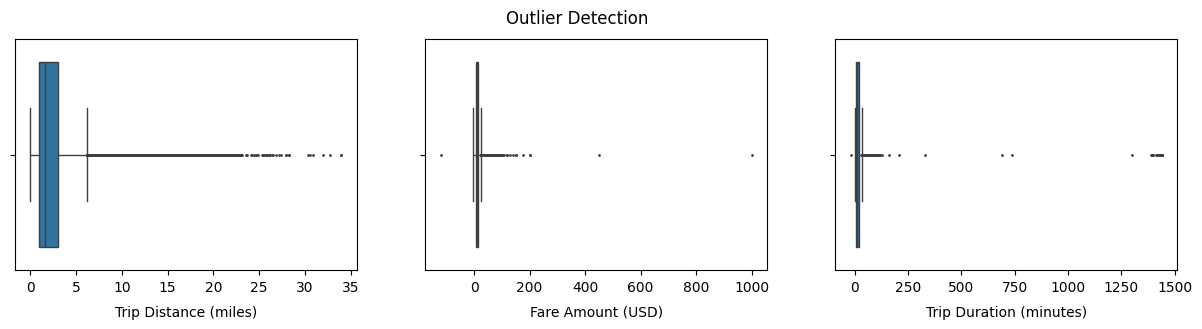

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(15, 3))
fig.suptitle('Outlier Detection')

sns.boxplot(ax=axes[0], x=nyc_taxi['trip_distance'], fliersize=1)
axes[0].set_xlabel('Trip Distance (miles)', labelpad=8)

sns.boxplot(ax=axes[1], x=nyc_taxi['fare_amount'], fliersize=1)
axes[1].set_xlabel('Fare Amount (USD)', labelpad=8)

sns.boxplot(ax=axes[2], x=nyc_taxi['duration'], fliersize=1)
axes[2].set_xlabel('Trip Duration (minutes)', labelpad=8)

plt.show()

All three variables contain outliers.

**`trip_distance`**: The minimum value for `trip_distance` is 0. This is possible if the passenger cancels the trip before it starts.  
There are some trips with distance around 30-35 miles. It's 30 miles from the southern tip of Staten Island to the northern end of Manhattan and that's in a straight line. <br>
With this knowledge and the distribution of the values in this column, it's reasonable to leave these values alone and not alter them.

**`fare_amount`** and **`duration`**: The `fare_amount` and `duration` contain zeros, and negative values. Also, the values at the higher end of these variables are very extreme which are problematic.

Let's first inspect the 0 values in the `trip_distance` column to check if these values are really errors (0) or they are just very short trip distances that get rounded down.

***`trip_distance`***

In [16]:
sorted(set(nyc_taxi['trip_distance']))[:5]

[0.0, 0.01, 0.02, 0.03, 0.04]

In [17]:
sum(nyc_taxi['trip_distance']==0)

148

The distances are captured with a high degree of precision.
But, there are also 148 trips with `trip_distance` 0. <br>
However, this is a very small sample (148 out of ~22,500) and will not have much impact on the model. Therefore, we'll leave it as it is.

***`fare_amount`***

In [18]:
nyc_taxi['fare_amount'].describe().apply(lambda x: format(x, 'g'))

count      22699
mean     13.0266
std      13.2438
min         -120
25%          6.5
50%          9.5
75%         14.5
max       999.99
Name: fare_amount, dtype: object

The negative fare values and the extreme high values are very problematic. 

High values can be capped based on intuition and statistics. The IQR for `fare_amount` is \$8. <br>
Let's replace the higher outliers with `Q3 + 6*IQR`, which results in the cap of \\$62.5; and the values less than 0 with \$0.

Values of 0 could be legitimate if the trips were immediately cancelled. 


In [19]:
nyc_taxi.loc[nyc_taxi['fare_amount']<0, 'fare_amount'] = 0
nyc_taxi['fare_amount'].min()

0.0

In [20]:
q3 = nyc_taxi['fare_amount'].quantile(0.75)
iqr = stats.iqr(nyc_taxi['fare_amount'])
upper_threshold = q3 + 6*iqr
print('Upper Threshold: ', upper_threshold)

nyc_taxi.loc[nyc_taxi['fare_amount']>upper_threshold, 'fare_amount'] = upper_threshold
print('Maximum Fare Amount: ', nyc_taxi['fare_amount'].max())

Upper Threshold:  62.5
Maximum Fare Amount:  62.5


***`duration`***

In [21]:
nyc_taxi['duration'].describe().apply(lambda x: format(x, 'g'))

count       22699
mean      17.0138
std       61.9965
min      -16.9833
25%          6.65
50%       11.1833
75%       18.3833
max       1439.55
Name: duration, dtype: object

Let's handle the outliers in this column in the same way as we did for the `fare_amount`.

In [22]:
nyc_taxi.loc[nyc_taxi['duration']<0, 'duration'] = 0
nyc_taxi['duration'].min()

0.0

In [23]:
q3 = nyc_taxi['duration'].quantile(0.75)
iqr = stats.iqr(nyc_taxi['duration'])
upper_threshold = q3 + 6*iqr

print('Upper Threshold: ', upper_threshold)

nyc_taxi.loc[nyc_taxi['duration']>upper_threshold, 'duration'] = upper_threshold
print('Maximum Duration: ', nyc_taxi['duration'].max())

Upper Threshold:  88.78333333333333
Maximum Duration:  88.78333333333333


### Feature Engineering

**Create `mean_distance` column for each pair of pickup and dropoff values**

In [24]:
nyc_taxi['pickup_dropoff'] = nyc_taxi['PULocationID'].apply(str) + ' ' + nyc_taxi['DOLocationID'].apply(str)

In [25]:
nyc_taxi.head(3)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667,100 231
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500000,186 43
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200000,262 236


In [26]:
mean_distance_pickup_dropoff = nyc_taxi.groupby('pickup_dropoff')['trip_distance'].mean()
mean_distance_pickup_dropoff

pickup_dropoff
1 1         2.433333
10 148     15.700000
100 1      16.890000
100 100     0.253333
100 107     1.180000
             ...    
97 65       0.500000
97 66       1.400000
97 80       3.840000
97 90       4.420000
97 97       1.006667
Name: trip_distance, Length: 4172, dtype: float64

In [27]:
mean_distance_pickup_dropoff_dict = mean_distance_pickup_dropoff.to_dict()
mean_distance_pickup_dropoff_dict

{'1 1': 2.433333333333333,
 '10 148': 15.7,
 '100 1': 16.89,
 '100 100': 0.25333333333333335,
 '100 107': 1.18,
 '100 113': 2.024,
 '100 114': 1.94,
 '100 12': 4.55,
 '100 125': 2.84,
 '100 13': 4.201666666666667,
 '100 132': 17.2175,
 '100 137': 1.299,
 '100 138': 10.432857142857143,
 '100 140': 2.746,
 '100 141': 2.11,
 '100 142': 1.6958333333333335,
 '100 143': 1.5825,
 '100 144': 3.0066666666666664,
 '100 148': 4.1066666666666665,
 '100 151': 3.668,
 '100 152': 4.9,
 '100 158': 1.938,
 '100 161': 0.9813888888888889,
 '100 162': 1.2163636363636363,
 '100 163': 1.2656,
 '100 164': 0.841,
 '100 166': 5.199999999999999,
 '100 170': 0.8548,
 '100 177': 12.0,
 '100 181': 9.34,
 '100 186': 0.6404761904761904,
 '100 193': 4.39,
 '100 198': 9.01,
 '100 202': 5.3,
 '100 209': 4.43,
 '100 211': 2.48,
 '100 224': 1.9500000000000002,
 '100 225': 7.5,
 '100 229': 1.7850000000000001,
 '100 230': 0.72975,
 '100 231': 3.5216666666666665,
 '100 232': 3.8449999999999998,
 '100 233': 1.245833333333333

In [28]:
nyc_taxi['mean_distance'] = nyc_taxi['pickup_dropoff'].map(mean_distance_pickup_dropoff_dict)

In [29]:
nyc_taxi[(nyc_taxi['PULocationID']==142) & (nyc_taxi['DOLocationID']==132)][['mean_distance']]

,mean_distance
2833,20.77
8356,20.77
11902,20.77
13816,20.77
15608,20.77
19413,20.77
22579,20.77


**Create `mean_duration` column for each pair of pickup and dropoff values**

In [30]:
mean_duration_pickup_dropoff_dict = nyc_taxi.groupby('pickup_dropoff')['duration'].mean().to_dict()
mean_duration_pickup_dropoff_dict

{'1 1': 0.4666666666666666,
 '10 148': 69.36666666666666,
 '100 1': 48.18333333333333,
 '100 100': 3.130555555555556,
 '100 107': 11.200000000000001,
 '100 113': 14.453333333333333,
 '100 114': 15.325,
 '100 12': 17.975,
 '100 125': 17.608333333333334,
 '100 13': 31.902777777777775,
 '100 132': 35.22083333333333,
 '100 137': 9.286666666666667,
 '100 138': 44.78333333333334,
 '100 140': 19.65,
 '100 141': 13.616666666666667,
 '100 142': 11.6,
 '100 143': 10.883333333333333,
 '100 144': 22.855555555555554,
 '100 148': 33.416666666666664,
 '100 151': 15.41,
 '100 152': 19.766666666666666,
 '100 158': 11.836666666666668,
 '100 161': 8.9875,
 '100 162': 11.11590909090909,
 '100 163': 11.472000000000001,
 '100 164': 9.518333333333334,
 '100 166': 15.816666666666666,
 '100 170': 8.276666666666666,
 '100 177': 58.53333333333333,
 '100 181': 28.55,
 '100 186': 5.765873015873016,
 '100 193': 15.566666666666666,
 '100 198': 53.9,
 '100 202': 39.35,
 '100 209': 29.733333333333334,
 '100 211': 14.3

In [31]:
nyc_taxi['mean_duration'] = nyc_taxi['pickup_dropoff'].map(mean_duration_pickup_dropoff_dict)
nyc_taxi[(nyc_taxi['PULocationID']==142) & (nyc_taxi['DOLocationID']==132)][['mean_duration']]

,mean_duration
2833,48.95
8356,48.95
11902,48.95
13816,48.95
15608,48.95
19413,48.95
22579,48.95


**Creating other columns**

In [32]:
nyc_taxi['day'] = nyc_taxi['tpep_pickup_datetime'].dt.day_name().str.lower()
nyc_taxi['month'] = nyc_taxi['tpep_pickup_datetime'].dt.strftime('%b').str.lower()

Let's create a `rush_hour` column.

We'll define rush hour as:
* Any weekday (not Saturday or Sunday) AND
* Either from 06:00&ndash;10:00 or from 16:00&ndash;20:00

In [33]:
nyc_taxi['rush_hour'] = nyc_taxi['tpep_pickup_datetime'].dt.hour

In [34]:
nyc_taxi.loc[nyc_taxi['day'].isin(['saturday', 'sunday']), 'rush_hour'] = 0

In [35]:
def check_rush_hour(row):
    if 6 <= row['rush_hour'] < 10:
        is_rush_hour = 1
    elif 16 <= row['rush_hour'] < 20:
        is_rush_hour = 1
    else:
        is_rush_hour = 0
    return is_rush_hour

In [36]:
nyc_taxi['rush_hour'] = nyc_taxi.apply(check_rush_hour, axis=1)
nyc_taxi.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,0.0,0.3,16.56,14.066667,100 231,3.521667,22.847222,saturday,mar,0
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,0.0,0.3,20.80,26.500000,186 43,3.108889,24.470370,tuesday,apr,0
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,0.0,0.3,8.75,7.200000,262 236,0.881429,7.250000,friday,dec,1
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,0.0,0.3,27.69,30.250000,188 97,3.700000,30.250000,sunday,may,0
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.0,0.3,17.80,16.716667,4 112,4.435000,14.616667,saturday,apr,0


### Regression Plot

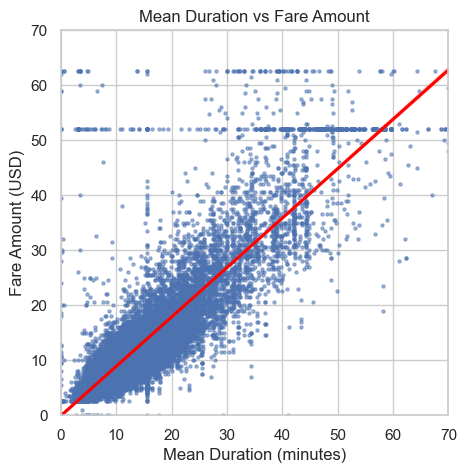

In [37]:
sns.set(style='whitegrid')
plt.figure(figsize=(5, 5))

sns.regplot(x='mean_duration', y='fare_amount', data=nyc_taxi,
            scatter_kws={'alpha':0.5, 's':5},
            line_kws={'color':'red'})
plt.ylim(0, 70)
plt.xlim(0, 70)

plt.title('Mean Duration vs Fare Amount')
plt.xlabel('Mean Duration (minutes)')
plt.ylabel('Fare Amount (USD)')
plt.show()

The `mean_duration` variable correlates with the `fare_amount`. 

Ther are two horizontal lines in the plot. One of the lines is at \\$62.50, which is the maximum that was imputed for outliers. The other line is near \$52. Let's explore this.

In [38]:
nyc_taxi[nyc_taxi['fare_amount'] > 50]['fare_amount'].value_counts().head()

fare_amount
52.0    514
62.5     84
59.0      9
50.5      9
57.5      8
Name: count, dtype: int64

In [39]:
nyc_taxi[nyc_taxi['fare_amount'] == 52]['fare_amount'].count()

np.int64(514)

There are 514 trips with the `fare_amount` of \$52.

In [40]:
pd.set_option('display.max_columns', None)
nyc_taxi[nyc_taxi['fare_amount'] == 52].head(20)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
11,18600059,2,2017-03-05 19:15:30,2017-03-05 19:52:18,2,18.90,2,N,236,132,1,52.0,0.0,0.5,14.58,5.54,0.3,72.92,36.800000,236 132,19.211667,40.500000,sunday,mar,0
110,47959795,1,2017-06-03 14:24:57,2017-06-03 15:31:48,1,18.00,2,N,132,163,1,52.0,0.0,0.5,0.00,0.00,0.3,52.80,66.850000,132 163,19.229000,52.941667,saturday,jun,0
161,95729204,2,2017-11-11 20:16:16,2017-11-11 20:17:14,1,0.23,2,N,132,132,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,0.966667,132 132,2.255862,3.021839,saturday,nov,0
247,103404868,2,2017-12-06 23:37:08,2017-12-07 00:06:19,1,18.93,2,N,132,79,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,29.183333,132 79,19.431667,47.275000,wednesday,dec,0
379,80479432,2,2017-09-24 23:45:45,2017-09-25 00:15:14,1,17.99,2,N,132,234,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,29.483333,132 234,17.654000,49.833333,sunday,sep,0
388,16226157,1,2017-02-28 18:30:05,2017-02-28 19:09:55,1,18.40,2,N,132,48,2,52.0,4.5,0.5,0.00,5.54,0.3,62.84,39.833333,132 48,18.761905,58.246032,tuesday,feb,1
406,55253442,2,2017-06-05 12:51:58,2017-06-05 13:07:35,1,4.73,2,N,228,88,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,15.616667,228 88,4.730000,15.616667,monday,jun,0
449,65900029,2,2017-08-03 22:47:14,2017-08-03 23:32:41,2,18.21,2,N,132,48,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,45.450000,132 48,18.761905,58.246032,thursday,aug,0
468,80904240,2,2017-09-26 13:48:26,2017-09-26 14:31:17,1,17.27,2,N,186,132,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,42.850000,186 132,17.096000,42.920000,tuesday,sep,0
520,33706214,2,2017-04-23 21:34:48,2017-04-23 22:46:23,6,18.34,2,N,132,148,1,52.0,0.0,0.5,5.00,0.00,0.3,57.80,71.583333,132 148,17.994286,46.340476,sunday,apr,0


Most of the trips in these 20 rows either begin or end at location code 132. All of these trips have `RatecodeId` 2.

In [41]:
fare_amount_52_trips = nyc_taxi[nyc_taxi['fare_amount'] == 52]
fare_amount_52_trips['RatecodeID'].value_counts()

RatecodeID
2     513
1       1
3       0
4       0
5       0
99      0
Name: count, dtype: int64

513 of all the 514 trips which had `fare_amount` of \$52 had `RatecodeID` 2.

Based on the information provided in the data dictionary this `RatecodeID` indicates that these trip were for JFK (John F. Kennedy International Ariport).

A quick internet search for "New York City Taxi Flat Rate \$52" indicates that in 2017 (the year that this data was collected) there was indeed a flat fare for taxi trips between JFK International Airport and Manhattan.

On doing further search, it was found that there is always a flat fare (`fare_amount`) between Manhattan and JFK Airport in either direction for Yellow Taxis (which we are dealing with). Therefore, we will not use these records for our model training.

In [42]:
set(nyc_taxi[nyc_taxi['RatecodeID'] == 2]['fare_amount'])

{52.0}

It is also clear from above code that the trips with `RatecodeID` as 2 had a flat rate of \$52.

### Isolate modeling variables

In [43]:
nyc_taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  category      
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  category      
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  category      
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

In [44]:
nyc_taxi_model_df = nyc_taxi[nyc_taxi['RatecodeID']!=2][['VendorID', 'passenger_count', 'fare_amount', 'mean_distance', 'mean_duration', 'rush_hour']].copy()

In [45]:
nyc_taxi_model_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22186 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   VendorID         22186 non-null  category
 1   passenger_count  22186 non-null  int64   
 2   fare_amount      22186 non-null  float64 
 3   mean_distance    22186 non-null  float64 
 4   mean_duration    22186 non-null  float64 
 5   rush_hour        22186 non-null  int64   
dtypes: category(1), float64(3), int64(2)
memory usage: 1.0 MB


In [46]:
nyc_taxi_model_df.head()

,VendorID,passenger_count,fare_amount,mean_distance,mean_duration,rush_hour
0,2,6,13.0,3.521667,22.847222,0
1,1,1,16.0,3.108889,24.470370,0
2,1,1,6.5,0.881429,7.250000,1
3,2,1,20.5,3.700000,30.250000,0
4,2,1,16.5,4.435000,14.616667,0


### Correlation Analysis

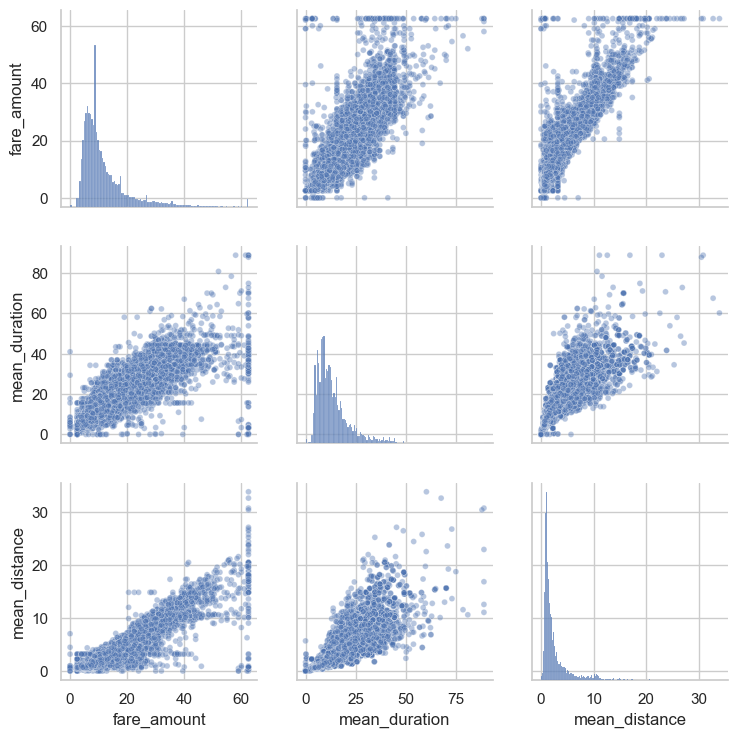

In [47]:
sns.pairplot(nyc_taxi_model_df[['fare_amount', 'mean_duration', 'mean_distance']],
             plot_kws={'alpha':0.4, 'size':5})
plt.subplots_adjust(hspace=0.2, wspace=0.2) 
plt.show()

All these variables show a linear correlation with each other.

In [48]:
nyc_taxi_model_df.corr()

,VendorID,passenger_count,fare_amount,mean_distance,mean_duration,rush_hour
VendorID,1.000000,0.267588,-0.003935,0.000615,-0.002209,-0.002814
passenger_count,0.267588,1.000000,0.013443,0.012436,0.014262,-0.023046
fare_amount,-0.003935,0.013443,1.000000,0.904079,0.847988,-0.027184
mean_distance,0.000615,0.012436,0.904079,1.000000,0.847113,-0.055347
mean_duration,-0.002209,0.014262,0.847988,0.847113,1.000000,-0.030633
rush_hour,-0.002814,-0.023046,-0.027184,-0.055347,-0.030633,1.000000


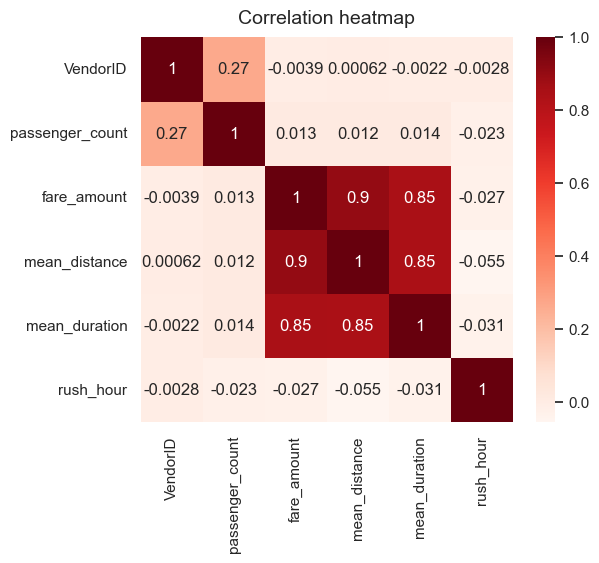

In [49]:
plt.figure(figsize=(6,5))

sns.heatmap(nyc_taxi_model_df.corr(method='pearson'), annot=True, cmap='Reds')
plt.title('Correlation heatmap',
          fontsize=14, pad=10)

plt.show()

`mean_duration` and `mean_distance` are both highly correlated with `fare_amount` 
They're also highly correlated with each other.

However, since we are more focused on prediction of `fare_amount` than using the model to understand the impact of each variable on the data, we will use both variables as predictors.

### Model Building

**Splitting Data into Features and Outcome Variable**

In [50]:
nyc_taxi_model_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22186 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   VendorID         22186 non-null  category
 1   passenger_count  22186 non-null  int64   
 2   fare_amount      22186 non-null  float64 
 3   mean_distance    22186 non-null  float64 
 4   mean_duration    22186 non-null  float64 
 5   rush_hour        22186 non-null  int64   
dtypes: category(1), float64(3), int64(2)
memory usage: 1.0 MB


In [51]:
X = nyc_taxi_model_df.drop(columns=['fare_amount'])
y = nyc_taxi_model_df[['fare_amount']]

In [52]:
X.head()

,VendorID,passenger_count,mean_distance,mean_duration,rush_hour
0,2,6,3.521667,22.847222,0
1,1,1,3.108889,24.470370,0
2,1,1,0.881429,7.250000,1
3,2,1,3.700000,30.250000,0
4,2,1,4.435000,14.616667,0


In [53]:
y.head()

,fare_amount
0,13.0
1,16.0
2,6.5
3,20.5
4,16.5


**Data Pre-processing**

In [54]:
X = pd.get_dummies(X, drop_first=True)
X.head()

,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_2
0,6,3.521667,22.847222,0,True
1,1,3.108889,24.470370,0,False
2,1,0.881429,7.250000,1,False
3,1,3.700000,30.250000,0,True
4,1,4.435000,14.616667,0,True


**Splitting Data into Train and Test Sets**

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

I have used `random_state` so that the notebook can be replicated. We'll implement `k-fold cross validation` to account for variance in train-test splits and better understand model performance.

**Standardize the data and Fit model**

In [56]:
scaler = StandardScaler()
scaler = scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
print('X_train scaled:', X_train_scaled)

X_train scaled: [[-0.49798663  0.38027303  0.9646922   1.54082591 -1.11066496]
 [ 1.83318974 -0.30430255 -0.54244512 -0.64900259  0.90036153]
 [-0.49798663 -0.05419356 -0.18157363  1.54082591  0.90036153]
 ...
 [-0.49798663 -0.57027071 -0.14940283 -0.64900259 -1.11066496]
 [-0.49798663 -0.49627124 -0.32684314 -0.64900259  0.90036153]
 [-0.49798663  2.31340622  0.84984894 -0.64900259 -1.11066496]]


In [57]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

**Model Evaluation**

*On Train Data*

In [58]:
r_square = model.score(X_train_scaled, y_train)
print('Coefficient of determination (R\u00B2):', r_square)

y_pred_train = model.predict(X_train_scaled)

print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred_train)))

Coefficient of determination (R²): 0.843104261246968
MAE: 1.9937191535643566
MSE: 12.29304800531468
RMSE: 3.506144321803465


*On Test Data*

In [59]:
X_test_scaled = scaler.transform(X_test)

y_pred_test = model.predict(X_test_scaled)
print('Coefficient of Determination (R\u00B2):', r2_score(y_test, y_pred_test))

print('MAE:', mean_absolute_error(y_test, y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_test)))

Coefficient of Determination (R²): 0.8350143241819232
MAE: 1.9867143303498291
MSE: 12.226850178462781
RMSE: 3.4966913187272883


The model performance is similar (and high) on both training and test sets, suggesting that the model performs well and generalizes to new data. <br>
An average error (MAE) of around \$2 means that, in practice, the model is doing quite well.

For the test data, an R<sup>2</sup> of 0.835 means the model describes 83.5% of the variance in `fare_amount`.


**K-fold Cross Validation**

In [60]:
X_scaled = scaler.transform(X)
X_scaled

array([[ 3.38730733,  0.3237818 ,  1.02965269, -0.64900259,  0.90036153],
       [-0.49798663,  0.17716959,  1.21430176, -0.64900259, -1.11066496],
       [-0.49798663, -0.61398949, -0.74468484,  1.54082591, -1.11066496],
       ...,
       [-0.49798663, -0.68402692, -0.81759456, -0.64900259,  0.90036153],
       [-0.49798663, -0.18916362,  0.32465767, -0.64900259,  0.90036153],
       [-0.49798663, -0.40246259, -0.49946918, -0.64900259, -1.11066496]],
      shape=(22186, 5))

In [61]:
cv_model = LinearRegression()

r2_scores = cross_val_score(cv_model, X_scaled, y, cv=5, scoring='r2')
mae_scores = cross_val_score(cv_model, X_scaled, y, cv=5, scoring='neg_mean_absolute_error')
mse_scores = cross_val_score(cv_model, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-mse_scores)

metrics_per_fold = pd.DataFrame([r2_scores, -mae_scores, -mse_scores, rmse_scores]).transpose()
metrics_per_fold.columns = ['R\u00B2 Score', 'MAE', 'MSE', 'RMSE']
metrics_per_fold

,R² Score,MAE,MSE,RMSE
0,0.833302,2.016994,12.752152,3.571016
1,0.838969,1.975515,12.773801,3.574046
2,0.836531,2.014711,13.025921,3.609144
3,0.860643,1.930845,10.791774,3.285084
4,0.837446,2.015853,12.119856,3.481358


The range of R<sup>2</sup> scores is from **0.8333** to **0.8606**. This is a *relatively narrow range*, which is a good sign of stability and consistency. The model seems to be generalizing well across different subsets of the data.

In [62]:
print("Average R\u00B2 score:", np.mean(r2_scores))
print("Average MAE:", np.mean(-mae_scores))
print("Average MSE:", np.mean(-mse_scores))
print("Average RMSE:", np.mean(rmse_scores))

Average R² score: 0.8413781757387397
Average MAE: 1.990783501460274
Average MSE: 12.292701027098792
Average RMSE: 3.504129432685044


The average of R<sup>2</sup> score is **0.84137**, which means that the model explains about **84%** of variance in `fare_amount`. This is a good result and suggests that the model is performing well in terms of explaining the relationship between the features and the target.

All these metrics are very close to the values of the metrics on test data.

### Results

In [63]:
results = pd.DataFrame(data={'actual': y_test['fare_amount'],
                             'predicted': y_pred_test.ravel()})
results['residual'] = results['actual'] - results['predicted']
results.head()

,actual,predicted,residual
18484,10.0,9.945645,0.054355
10872,4.0,5.076813,-1.076813
15776,13.5,7.404386,6.095614
13639,9.5,9.669507,-0.169507
18446,12.5,6.555901,5.944099


**Visualizing the Results**

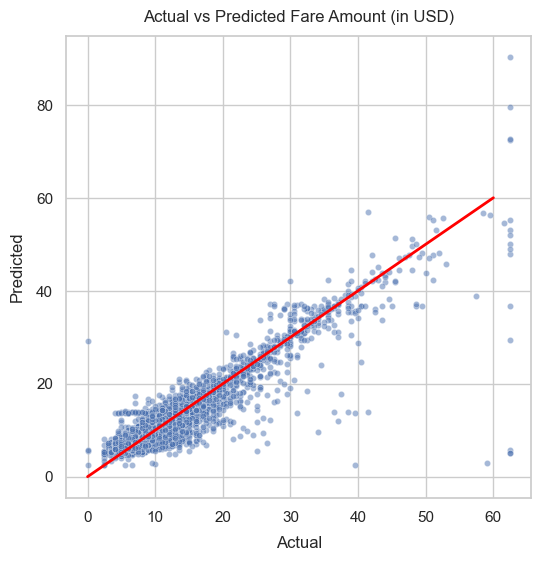

In [64]:
plt.figure(figsize=(6, 6))

sns.set(style='whitegrid')
sns.scatterplot(x='actual', y='predicted', data=results,
                s=20, alpha=0.5)

plt.plot([0,60], [0,60], c='red', linewidth=2)

plt.title('Actual vs Predicted Fare Amount (in USD)', pad=10)
plt.xlabel('Actual', labelpad=8)
plt.ylabel('Predicted', labelpad=8)
plt.show()

**Visualizing the distribution of residuals**

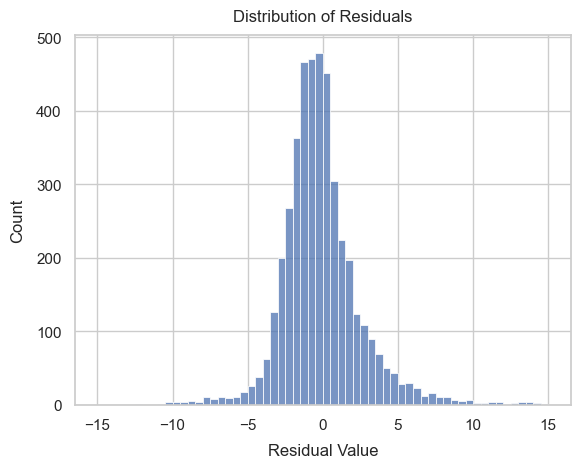

In [65]:
sns.histplot(results['residual'], bins=np.arange(-15,15.5,0.5))
plt.title('Distribution of Residuals', pad=10)
plt.xlabel('Residual Value', labelpad=8)
plt.ylabel('Count', labelpad=8)
plt.show()

In [66]:
results['residual'].mean()

np.float64(-0.009315218477922773)

The residuals are approximately normally distributed with a mean of -0.009. These residuals represent the variance in the outcome variable that is not explained by the model. A normal distribution centered around zero is good, as it demonstrates that the model's errors are evenly distributed and unbiased.

**Residuals vs Predicted Values**

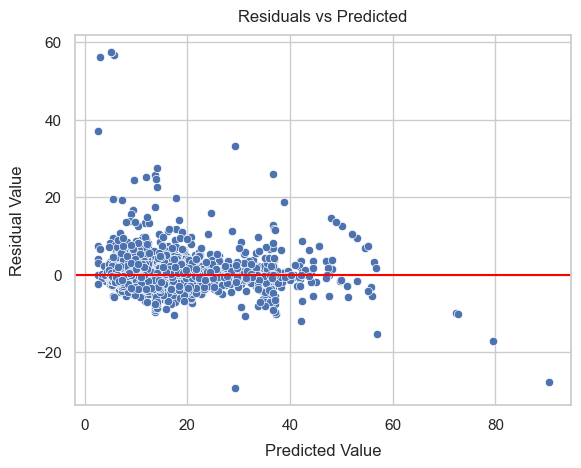

In [67]:
sns.scatterplot(x='predicted', y='residual', data=results)
plt.axhline(0, c='red')
plt.title('Residuals vs Predicted', pad=10)
plt.xlabel('Predicted Value', labelpad=8)
plt.ylabel('Residual Value', labelpad=8)
plt.show()

The model's residuals are almost symmetrically distributed around X-axis, except for the diagnoal line from the top-left to the bottom-right corner, which represents the imputed maximum of \\$62.50

**Model Coefficients**

In [68]:
coefficients = pd.DataFrame(model.coef_, columns=X.columns)
coefficients

,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_2
0,0.036347,5.913463,2.491352,0.151259,-0.030709


`mean_distance` has the greatest weight in the model's final prediction. <br>
Since the training data was standardized, let's convert it back into miles to understand the increase in `fare amount` for every extra mile. 

In [69]:
print(X_train['mean_distance'].std())
print(5.913463 / X_train['mean_distance'].std())

2.815518566895656
2.1003104257700156


For every mile traveled, the fare increased by an average of \\$2.1

### Training on Full Dataset

In [70]:
pipeline = make_pipeline(StandardScaler(), LinearRegression())
pipeline.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [71]:
y_preds_full = pipeline.predict(X)
y_preds_full

array([[16.48744338],
       [16.08813186],
       [ 6.82407277],
       ...,
       [ 5.80008117],
       [11.60271008],
       [ 8.33239541]], shape=(22186, 1))

In [72]:
print('R^2:', r2_score(y, y_preds_full))
print('MAE:', mean_absolute_error(y, y_preds_full))
print('MSE:', mean_squared_error(y, y_preds_full))
print('RMSE:',np.sqrt(mean_squared_error(y, y_preds_full)))

R^2: 0.8415958097193756
MAE: 1.9901085911015985
MSE: 12.277656098297342
RMSE: 3.5039486437870835


Let's save these final predictions and `mean_duration` and `mean_distance` columns for downstream use.

In [73]:
nyc_preds_means = nyc_taxi[nyc_taxi['RatecodeID']!=2][['mean_duration', 'mean_distance']].copy()
nyc_preds_means['predicted_fare'] = y_preds_full

nyc_preds_means.head()

,mean_duration,mean_distance,predicted_fare
0,22.847222,3.521667,16.487443
1,24.470370,3.108889,16.088132
2,7.250000,0.881429,6.824073
3,30.250000,3.700000,18.913687
4,14.616667,4.435000,15.898720


In [74]:
nyc_preds_means.to_csv('NYC Trips Predicted Means.csv', index=False)

### Save Model

In [75]:
import joblib
joblib.dump(pipeline, 'NYC Trips Fare Amount Model.pkl')

['NYC Trips Fare Amount Model.pkl']

This model can be used to predict `fare_amount` for all trips, except where RatecodeID=2, which had a flat rate.